# Binary Logistic Regression

## Example 1

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [47]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [48]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [49]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

In [50]:
model.classes_

array([0, 1])

In [51]:
model.intercept_

array([-1.04608067])

In [52]:
model.coef_

array([[0.51491375]])

In [53]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [54]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [55]:
model.score(x, y)

0.9

In [56]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

In [57]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [58]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [59]:
model.intercept_

array([-3.51335372])

In [60]:
model.coef_

array([[1.12066084]])

In [61]:
model.predict_proba(x)

array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

In [62]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [63]:
model.score(x, y)

1.0

In [64]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [65]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## Example 2

In [67]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)

In [68]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [72]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [73]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

C:\Users\ncnih\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116,   9],
       [ 26,  41]], dtype=int64)

In [75]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.61      0.70        67

        accuracy                           0.82       192
       macro avg       0.82      0.77      0.78       192
    weighted avg       0.82      0.82      0.81       192



## Multiclass Logistic Regression

## 1. One-Vs-Rest (OVR)
One-vs.-rest (or one-vs-all, OvA) classifier involves training a single classifier per class, with the samples of that class as positive sample and all other samples as negatives. For OVA, the assumption is that there are  N  independent classification problems, meaning  N  classes, and for each class we learn a logistic (probability) model. The key assumption is that each of these problems is independent of the other  N−1  logistic regression problems. Hence for each sample we either classify this as class  Yi  or not. This is repeated for all classes.

## 2. Multinomial
The alternative to One vs Rest classifier is the multinomial logistic regression classifier. The multinomial classifier does not classifier each class seperately, instead it uses the softmax function to predict if a single data point falls in one of the  N  classes. Most of the times you may not see a significant difference in the results but one benifit is that you model the entire distribution  P(Yi=c)=SoftMax(β1,x1,β2,x2....βn,xn,)  rather than the individual distributions  P(Yi=c) .

What method should you use? It typically pays to try both and see how well it works on your validation/test set.

## Example 1

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [77]:
digits_df = datasets.load_digits()
print('Digits dataset structure= ', dir(digits_df))
print('Data shape= ', digits_df.data.shape)
print('Data conatins pixel representation of each image, \n', digits_df.data)

Digits dataset structure=  ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
Data shape=  (1797, 64)
Data conatins pixel representation of each image, 
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


Visualize the data

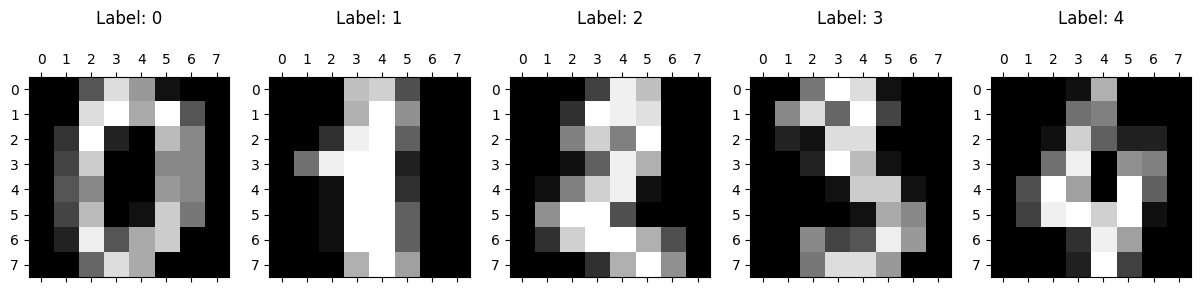

In [79]:
# Using subplot to plot the digits from 0 to 4
rows = 1
columns = 5
fig, ax =  plt.subplots(rows, columns, figsize = (15,6))

plt.gray()
for i in range(columns):
  ax[i].matshow(digits_df.images[i]) 
  ax[i].set_title('Label: %s\n' % digits_df.target_names[i])

plt.show()

In [80]:
X = digits_df.data
y = digits_df.target

In [85]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state = 1)

print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (1437, 64)
X_test dimension=  (360, 64)
y_train dimension=  (1437,)
y_test dimension=  (360,)


In [86]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

Predicted value is = [4]
Actual value from test data is 4 and corresponding image is as below


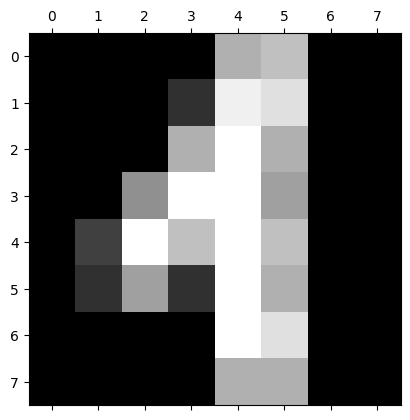

In [87]:
print('Predicted value is =', lm.predict([X_test[200]]))

print('Actual value from test data is %s and corresponding image is as below' % (y_test[200]) )
plt.matshow(digits_df.images[200]) 
plt.show() 

In [88]:
lm.score(X_test, y_test)

0.9694444444444444

C:\Users\ncnih\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[42,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 29,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 27,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 32]], dtype=int64)

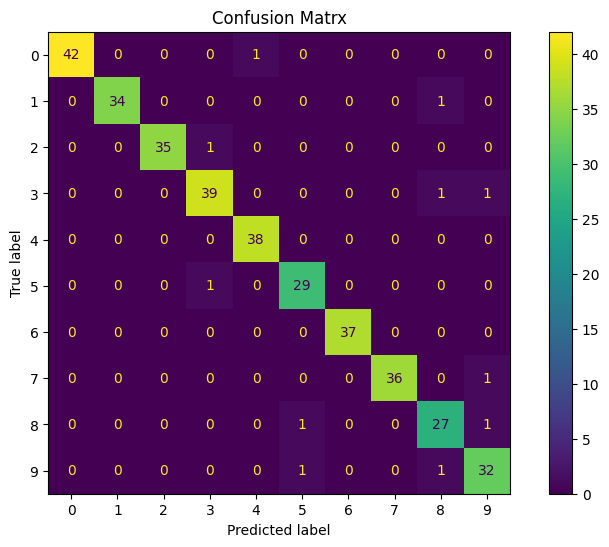

In [89]:
#Creating matplotlib axes object to assign figuresize and figure title
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(lm, X_test, y_test, display_labels= digits_df.target_names, ax = ax)
disp.confusion_matrix

In [90]:
print(metrics.classification_report(y_test, lm.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      0.97      0.99        35
           2       1.00      0.97      0.99        36
           3       0.95      0.95      0.95        41
           4       0.97      1.00      0.99        38
           5       0.94      0.97      0.95        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       0.90      0.93      0.92        29
           9       0.91      0.94      0.93        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## Example 2

In [91]:
# Here is the distplot used to generate Age plot. Modify features variable for fare.
import numpy as np
import pandas as pd
# import seaborn as sns
from sklearn import datasets,metrics
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
iris_data = iris.data
iris_data = pd.DataFrame(iris_data, columns=iris.feature_names)
iris_data['species'] = iris.target 
iris_data['species'].unique()

features = iris.feature_names
target = 'species'

X = iris_data[features]
y = iris_data[target]

In [95]:
lr_iris = LogisticRegression(multi_class='ovr')
lr_iris = lr_iris.fit(X, y)
y_pred = lr_iris.predict(X)

print(metrics.accuracy_score(y_pred,y))

0.9533333333333334


In [96]:
lr_iris = LogisticRegression(multi_class='multinomial',solver='newton-cg')
lr_iris = lr_iris.fit(X, y)
y_pred = lr_iris.predict(X)

print(metrics.accuracy_score(y_pred,y))

0.9733333333333334
